# Spam Messages Detection using NLP 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
data = pd.read_csv(r"D:\MY_WORK\MyContents\NLP\Codes\Spam Text Classification\spam.tsv", sep ='\t')
data.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [3]:
data.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [4]:
len(data)

5572

In [5]:
data['label'].value_counts()  

ham     4825
spam     747
Name: label, dtype: int64

#data seems to imbalance, as it is skewed type of dataset 

#we need to balance data 

# Balancing data 

In [6]:
ham = data[data['label'] == 'ham']
ham

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
6,ham,Even my brother is not like to speak with me. ...,77,2
...,...,...,...,...
5565,ham,Huh y lei...,12,3
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1


In [7]:
spam = data[data['label'] == 'spam']
spam

,label,message,length,punct
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
8,spam,WINNER!! As a valued network customer you have...,157,6
9,spam,Had your mobile 11 months or more? U R entitle...,154,2
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136,8
...,...,...,...,...
5537,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
5547,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3


In [8]:
ham.shape, spam.shape

((4825, 4), (747, 4))

In [9]:
ham = ham.sample(spam.shape[0])
ham.shape, spam.shape

((747, 4), (747, 4))

#Now ham & spam dataset are seems to be balanced , thus avoiding the skewed conditions 

In [10]:
data = ham.append(spam, ignore_index = True)
data.head(2)

,label,message,length,punct
0,ham,";-( oh well, c u later",22,4
1,ham,I'm in a movie. Call me 4 wat?,30,3


In [11]:
data.shape

(1494, 4)

# Exploratory Data analysis 

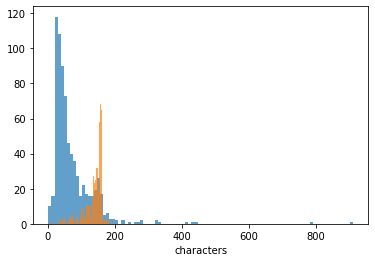

In [12]:
plt.hist(data[data['label'] == 'ham']['length'], bins = 100, alpha = 0.7)
plt.hist(data[data['label'] == 'spam']['length'], bins = 100, alpha = 0.7)
plt.xlabel("characters")
plt.show()

It can be analysed that the spam messages contain more characters when compared with the ham messages 

# Data preparation & cleaning process 

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(data['message'],data['label'], test_size = 0.2, random_state = 0,
                                                    shuffle = True, stratify = data['label'] )

In [20]:
X_train

124                        Have you finished work yet? :)
662     Life is nothing wen v get everything. But "lif...
1007    You have WON a guaranteed £1000 cash or a £200...
1151    Do you ever notice that when you're driving, a...
1096    This message is brought to you by GMW Ltd. and...
                              ...                        
1321    Show ur colours! Euro 2004 2-4-1 Offer! Get an...
312                              Chk in ur belovd ms dict
268     Wen ur lovable bcums angry wid u, dnt take it ...
272     Quite late lar... Ard 12 anyway i wun b drivin...
934     FREE entry into our £250 weekly comp just send...
Name: message, Length: 1195, dtype: object

##  Bag of words using TF-IDF 

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)

In [16]:
X_train.shape   # there are today 1195 rows with 3983 uniques words among them 

(1195, 4035)

# Pipeline & Random Forest 

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

In [22]:
clf = Pipeline([('tfidf', TfidfVectorizer()), ('clf', RandomForestClassifier(n_estimators=100, n_jobs=-1))])
clf.fit(X_train, Y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                               

Important step here is : If you find erorr as lower not found 
then you need to update the vectorizer X_train above while doing train & test split then skip vectorization step &
again run the pipeline
This error will be solved 

In [23]:
Y_predict = clf.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
confusion_matrix(Y_test, Y_predict)

array([[147,   3],
       [ 18, 131]], dtype=int64)

There are total 147+3 = 150 true messages indicating Ham messages , out of which 3 messages are spam but predicted as ham. 
18 + 131  =  319 messages are Spam messages, out which of which 18 messages are ham but predicted as spam 


In [26]:
print(classification_report(Y_test, Y_predict))

              precision    recall  f1-score   support

         ham       0.89      0.98      0.93       150
        spam       0.98      0.88      0.93       149

    accuracy                           0.93       299
   macro avg       0.93      0.93      0.93       299
weighted avg       0.93      0.93      0.93       299



In [28]:
print( " The accuracy level is =", accuracy_score(Y_test, Y_predict)*100, "%")

 The accuracy level is = 92.97658862876254 %


# Predicting on the real message 

In [30]:
clf.predict(['Hello , I am Amitesh Pandey'])

array(['ham'], dtype=object)

In [31]:
clf.predict(['Hey wassup'])

array(['ham'], dtype=object)

In [46]:
clf.predict(['Congratulations ! you have won a free ticket to USA'])

array(['spam'], dtype=object)

In [53]:
 clf.predict(['you have won a free ticket to USA'])   # remove congrtulation and free word and check its effect

array(['spam'], dtype=object)

# Pipeline and SVM 

In [54]:
from sklearn.svm import SVC

In [55]:
clf = Pipeline([('tfidf', TfidfVectorizer()), ('clf', SVC(C=1000, gamma ='auto'))])
clf.fit(X_train, Y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma='aut

In [56]:
Y_predict = clf.predict(X_test)

In [57]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
confusion_matrix(Y_test, Y_predict)

array([[149,   1],
       [ 15, 134]], dtype=int64)

In [58]:
print(classification_report(Y_test, Y_predict))

              precision    recall  f1-score   support

         ham       0.91      0.99      0.95       150
        spam       0.99      0.90      0.94       149

    accuracy                           0.95       299
   macro avg       0.95      0.95      0.95       299
weighted avg       0.95      0.95      0.95       299



In [59]:
print( " The accuracy level for SVM is =", accuracy_score(Y_test, Y_predict)*100, "%")

 The accuracy level for SVM is = 94.64882943143813 %


In [61]:
clf.predict(['Hello , I am Amitesh Pandey'])

array(['ham'], dtype=object)

In [62]:
clf.predict(['Congratulations ! you have won a free ticket to USA'])

array(['spam'], dtype=object)

In [63]:
clf.predict(['you have won a free ticket to USA'])

array(['spam'], dtype=object)

In [64]:
clf.predict(['you have won a ticket to USA'])

array(['ham'], dtype=object)